In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
print (x_train[2,12,:,0])

[0.         0.         0.         0.62352943 0.99607843 0.47058824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.6392157  0.99607843 0.84705883 0.0627451  0.         0.
 0.         0.         0.         0.        ]


(60000, 28, 28, 1)


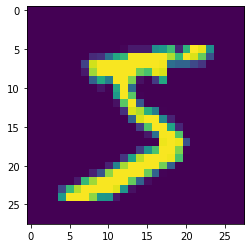

In [13]:
import matplotlib.pyplot as plt
print (x_train.shape)
plt.imshow (x_train[0,:,:,0])

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 97ms/step - loss: 0.3575 - accuracy: 0.8928 - val_loss: 0.0887 - val_accuracy: 0.9748
Epoch 2/15
422/422 [==============================] - 41s 97ms/step - loss: 0.1109 - accuracy: 0.9661 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0844 - accuracy: 0.9735 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0419 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 6/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.0357 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0345 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027679314836859703
Test accuracy: 0.9909999966621399


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
model.save ('/content/drive/MyDrive/Modelos/mnist_model.h5')